In [3]:
!python -m pip install scikit-image

  Using cached tifffile-2025.5.10-py3-none-any.whl.metadata (31 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.8 MB 18.7 MB/s eta 0:00:01
   ----------------------- ---------------- 7.6/12.8 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 21.1 MB/s  0:00:00
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Using cached tifffile-2025.5.10-py3-none-any.whl (226 kB)

   ---------------------------------------- 0/3 [tifffile]
   -------------------------- ------------- 2/3 [scikit-image]
   -------------------------- ------------- 2/3 [scikit-image]
   -------------------------- ------------- 2/3 [scikit-image]
   -------------------------- ------------- 2/3 [scikit-image]
   -------------------------- ------------- 2/3 [scikit-image]
   -------------------------- ------------- 2/3 [scikit-image]
   -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


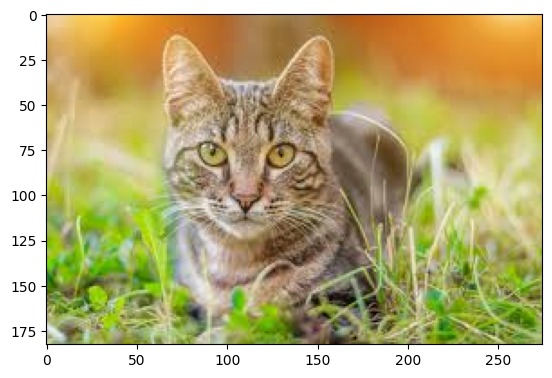

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

my_dog = imread('gato.jpeg')
plt.imshow(my_dog, cmap='gray')

In [14]:
r_scaled = rescale(my_dog[:,:,0], 1.0)
g_scaled = rescale(my_dog[:,:,1], 1.00)
b_scaled = rescale(my_dog[:,:,2], 1.00)
my_dog_scaled = np.stack([r_scaled, g_scaled, b_scaled], axis=2)
my_dog_gray = rescale(rgb2gray(my_dog), 1.00)

In [15]:
def rgb_convolve2d(image, kernel):
    red = convolve2d(image[:,:,0], kernel, 'valid')
    green = convolve2d(image[:,:,1], kernel, 'valid')
    blue = convolve2d(image[:,:,2], kernel, 'valid')
    return np.stack([red, green, blue], axis=2)

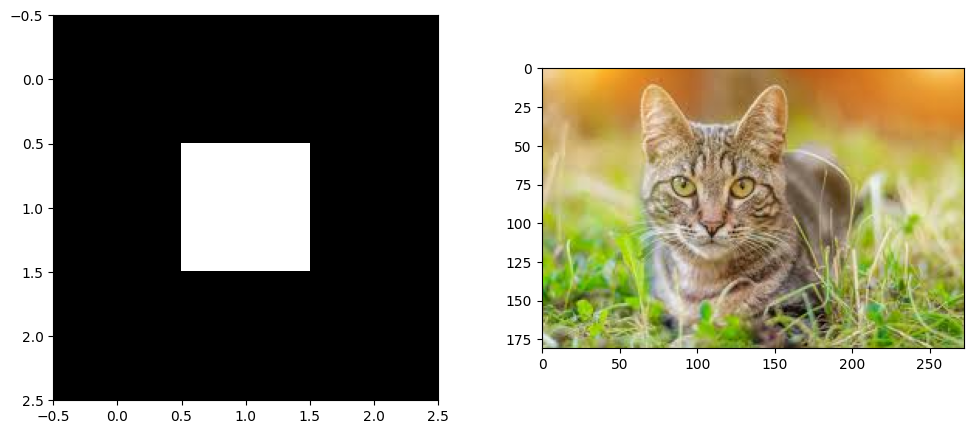

In [16]:
identity = np.array([[0, 0, 0],
                     [0, 1, 0],
                     [0, 0, 0]])
conv_im1 = rgb_convolve2d(my_dog_scaled, identity)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].imshow(identity, cmap='gray')
ax[1].imshow(abs(conv_im1), cmap='gray');

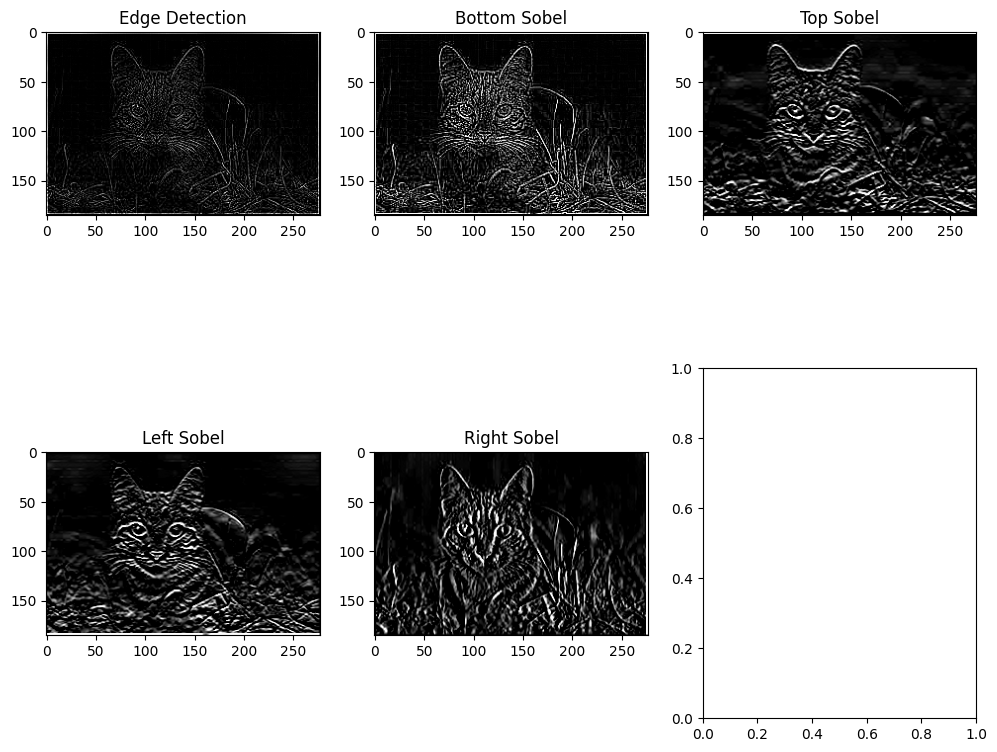

In [17]:
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection',#1’, ‘Edge Detection#2’, 
               'Bottom Sobel', 'Top Sobel', 
               'Left Sobel', 'Right Sobel']
figure, axis = plt.subplots(2,3, figsize=(12,10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(my_dog_gray, 
                           kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)


In [ ]:
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Gaussian Blur 5x5
kernel11 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
# Unsharp masking 5x5
kernel12 = -(1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, -476, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])
kernels = [kernel7, kernel8, kernel9, kernel10, kernel11, kernel12]
kernel_name = ['Sharpen', 'Emboss', 'Box Blur', 
               '3x3 Gaussian Blur', '5x5 Gaussian Blur', 
               '5x5 Unsharp Masking']
figure, axis = plt.subplots(2,3, figsize=(12,10))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = rgb_convolve2d(my_dog_scaled, 
                               kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)